# Introduction to Word Embeddings

Based on https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

In [1]:
# Download GloVe vectors from https://nlp.stanford.edu/projects/glove/
# Specifically the 6B one, which is the smallest: http://nlp.stanford.edu/data/glove.6B.zip

import os
import numpy as np
from scipy import spatial
from sklearn.manifold import TSNE

In [7]:
embeddings_dict = {}
glove_file = os.path.join("glove.6B", "glove.6B.100d.txt") # Modify this as needed
with open(glove_file, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

print("There are {} words in the dictionary".format(len(embeddings_dict)))

word = "king"
vec = embeddings_dict[word]
print("\nVector for \"{}\":".format(word))
print(vec)
print("Vector length: {}".format(len(vec)))

There are 400000 words in the dictionary

Vector for "king":
[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.4139

In [8]:
def find_closest_embeddings(vec, N):
    sorted_dict = sorted(embeddings_dict.keys(), 
        key=lambda word: spatial.distance.euclidean(embeddings_dict[word], vec))
    return sorted_dict[1:N+1]

vec = embeddings_dict["king"]
print(find_closest_embeddings(vec,3))

vec = embeddings_dict["king"] + embeddings_dict["woman"] - embeddings_dict["man"]
print(find_closest_embeddings(vec,3))

vec = embeddings_dict["south"] - embeddings_dict["down"] + embeddings_dict["up"]
print(find_closest_embeddings(vec,3))

['prince', 'queen', 'monarch']
['queen', 'monarch', 'throne']
['north', 'west', 'east']


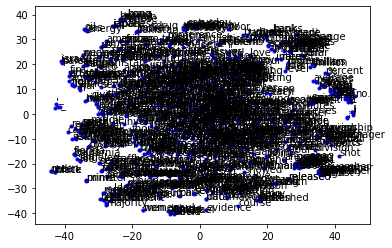

In [9]:
import matplotlib.pyplot as plt
import mpld3
%matplotlib inline
mpld3.enable_notebook()

tsne = TSNE(n_components=2, random_state=0)
words = list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:1000])

plt.plot(Y[:,0], Y[:,1] ,"b.")
for label, x, y in zip(words, Y[:, 0].tolist(), Y[:, 1].tolist()):
    plt.text(x, y, label)
plt.show()